# Tour & Travels Customer Churn
___
___

### Sobre o 'Churn'

  Churn é definido em termos comerciais como "quando um cliente cancela uma assinatura de um serviço que ele estava fazendo uso.  
  Então temos que o 'Churn Prediction' está essencialmente prevendo quais clientes têm maior probabilidade de cancelar uma assinatura, ou seja, "deixar uma empresa" com base no uso do serviço.  
  Do ponto de vista da empresa, é importante ter essas informações, uma vez que conquistar novos clientes muitas vezes é árduo e mais caro do que reter os antigos.

### Sobre o dataset utilizado

Uma empresa de turismo e viagens deseja prever se um cliente irá se desligar ou não com base nos indicadores fornecidos.
* Disponível em: https://www.kaggle.com/datasets/tejashvi14/tour-travels-customer-churn-prediction/code

### Sobre as colunas do dataset

    Age                 ->  Idade do usuário;
    FrequentFlyer       ->  Se o cliente faz voos frequentes;
    AnnualIncomeClass   ->  Classe de renda anual do usuário;
    ServicesOpted       ->  Número de vezes que os serviços foram escolhidos nos últimos 
                            anos;
    AccountSynced       ->  Se a conta corporativa do usuário foi sincronizada com suas
                            mídias sociais;
    BookedHotelOrNot    ->  Se o cliente reserva hospedagens/hotéis usando os serviços 
                            da empresa;
    Target              ->  1- Cliente cancelou | 0- Cliente não cancelou.

## Bibliotecas utilizadas
___

In [1]:
# Bibliotecas padrão
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import tree

In [2]:
# Algoritmos de classificação
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Pré-processamento
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

In [3]:
# Métricas de avaliação
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Constantes
RANDOM_STATE = 42
CUSTOM_PALETTE_0 = ['#F05454', '#30475E', '#222831', '#F7A9A8']
CUSTOM_PALETTE_1 = ['#222831', '#30475E', '#6c757d', '#F7A9A8', '#E88C93', '#F05454']
CUSTOM_PALETTE_2 = ['#d96e7d', '#e88c93', '#f7a9a8', '#1b3b6f', '#201e5b', '#240046', 
                    '#763fa3', '#c77dff', '#e0aaff']

In [6]:
# Configurações
%matplotlib inline
sns.set_theme(style='darkgrid', palette=CUSTOM_PALETTE_0, font_scale=1.1)

## Importação e tratamento dos dados
___

###### Importar csv e colocá-lo como DataFrame

In [7]:
data = pd.read_csv('data/Customertravel.csv')
data.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


###### Informações iniciais sobre o dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


###### Descrições iniciais sobre o dataset

In [9]:
data.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


###### Alterar nome das colunas do dataset

In [10]:
data.columns = ('age', 'frequent_flyer', 'annual_income_class', 'services_opted', 'account_synced',
               'booked_hotel', 'target')
data.head(0)

,age,frequent_flyer,annual_income_class,services_opted,account_synced,booked_hotel,target


###### Verificar dados nulos

In [11]:
data.isnull().sum()

age                    0
frequent_flyer         0
annual_income_class    0
services_opted         0
account_synced         0
booked_hotel           0
target                 0
dtype: int64

Não há dados faltantes na base de dados.

###### Verificar colunas categóricas

In [12]:
for column in data.columns:
    if data[column].dtype == object:
        print(f'Coluna: {column}\n')
        print(data[column].value_counts())
        print('\n' + '-'*100 + '\n')

Coluna: frequent_flyer

No           608
Yes          286
No Record     60
Name: frequent_flyer, dtype: int64

----------------------------------------------------------------------------------------------------

Coluna: annual_income_class

Middle Income    409
Low Income       386
High Income      159
Name: annual_income_class, dtype: int64

----------------------------------------------------------------------------------------------------

Coluna: account_synced

No     594
Yes    360
Name: account_synced, dtype: int64

----------------------------------------------------------------------------------------------------

Coluna: booked_hotel

No     576
Yes    378
Name: booked_hotel, dtype: int64

----------------------------------------------------------------------------------------------------



###### Verificar balanceamento da classe alvo

In [13]:
data['target'].value_counts()

0    730
1    224
Name: target, dtype: int64

In [14]:
class_0 = data['target'].value_counts()[0]
class_1 = data['target'].value_counts()[1]

print(f'Classe 0: {class_0/(class_0 + class_1):.2f}%')
print(f'Classe 1: {class_1/(class_0 + class_1):.2f}%')

Classe 0: 0.77%
Classe 1: 0.23%


As classes possuem um nível um pouco alto de desbalanceamento.

## Exploração dos dados
___

##### Desbalanceamento

Text(0.5, 1.0, 'Desbalanceamento da classe alvo')

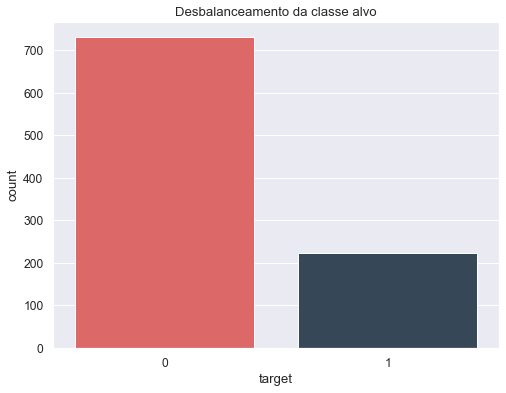

In [15]:
# Gráfico
plt.figure(figsize=(8, 6))
sns.countplot(x=data['target'])
plt.title('Desbalanceamento da classe alvo')

##### Distribuição da idade dos clientes

Text(0.5, 1.0, 'Idade dos clientes')

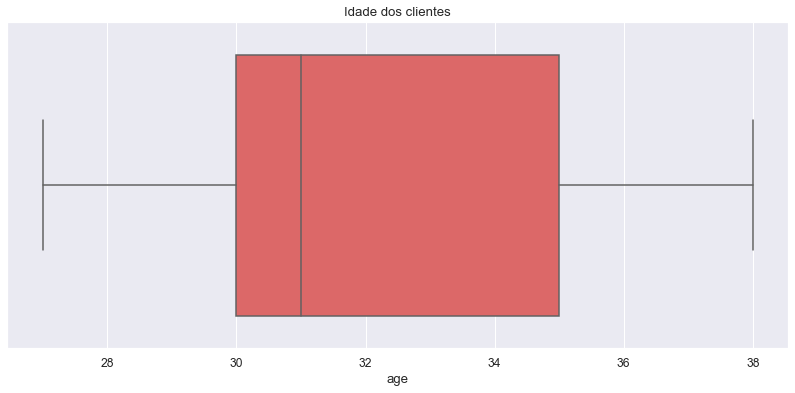

In [16]:
# Gráfico
plt.figure(figsize=(14, 6))
sns.boxplot(x=data['age'])
plt.title('Idade dos clientes')

Através do boxplot conseguimos perceber que não há outliers. Além disso, verificamos que a idade dos clientes variam mais ou menos entre 27 e 38 anos, com uma mediana em 31 anos.

##### Voos frequentes

Text(0.5, 1.0, 'Voos frequentes')

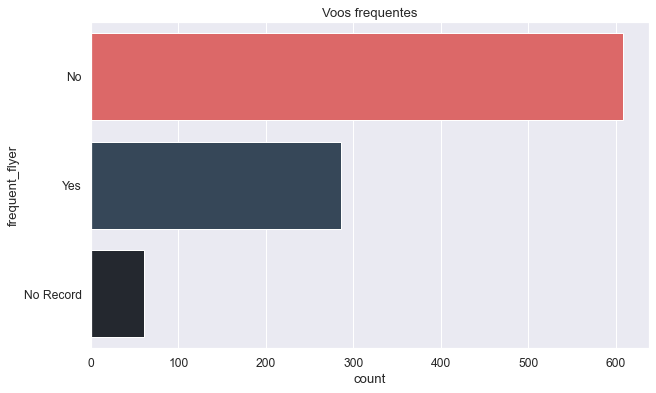

In [17]:
# Gráfico
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='frequent_flyer')
plt.title('Voos frequentes')

Grande parte dos clientes não fazem voos frequentes.

##### Renda anual

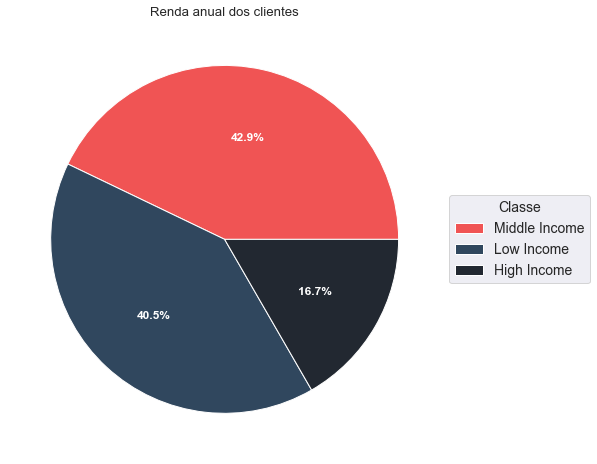

In [18]:
# Gráfico
plt.figure(figsize=(14, 8))
plt.title('Renda anual dos clientes')
plt.pie(x=data['annual_income_class'].value_counts(), autopct='%1.1f%%', textprops={'color':'white', 'weight':'bold', 'size':12})
plt.legend(labels=data['annual_income_class'].value_counts().index,
          title='Classe',
          title_fontsize=14,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          prop={'size':14})

Percebe-se que a maioria dos clientes possuem renda média (42,9% dos clientes) e renda baixa (40,5% dos clientes). Dessa forma, talvez seja interessante fazer mais ofertas de viagens que se encaixe nesses perfis do que viagens que se encaixe no perfil de renda 'High Income'.  
Porém é importante salientar que se o perfil 'High Income' gera muitos lucros pra empresa, então é necessário olhar com calma para o cenário, além de que, se gera muitos lucros, é interessante que se faça estratégias para conseguir mais clientes com esse perfil e preservar os existentes.

##### Número de vezes que os serviços foram escolhidos nos últimos anos

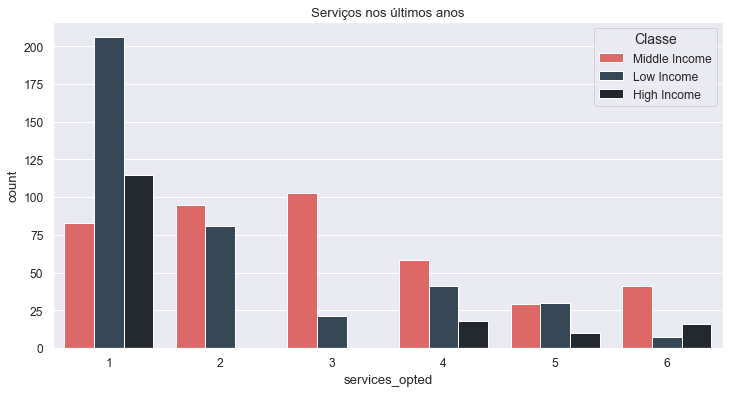

In [19]:
# Gráfico
plt.figure(figsize=(12, 6))
sns.countplot(x=data['services_opted'], hue=data['annual_income_class'])
plt.title('Serviços nos últimos anos')
plt.legend(title='Classe', title_fontsize=14)

Clientes da classe 'Low Income' e 'High Income' fizeram, em sua maioria, apenas uma viagem nos últimos anos, enquanto clientes com o perfil 'Middle Income' fizeram entre uma e três viagens. Vale ressaltar que nenhum cliente 'High Income' fez duas ou três viagens, porém teve alguns que fizeram mais que três.  
Talvez seja possível adotar estratégias para incentivar clientes 'Low Income' e 'High Income' a realizarem mais viagens, já que a maioria fez somente uma nos últimos anos.


##### Correlação entre features

In [20]:
# Transformar colunas categóricas para numéricas
data_corr = data.copy()
replacement = {'frequent_flyer': {'No': 0, 'Yes': 1, 'No Record': -1},
                'annual_income_class': {'Low Income': 0, 'Middle Income': 1, 'High Income': 2},
                'account_synced': {'No':0, 'Yes': 1},
                'booked_hotel': {'No': 0, 'Yes': 1}}
data_corr = data_corr.replace(replacement)
data_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  954 non-null    int64
 1   frequent_flyer       954 non-null    int64
 2   annual_income_class  954 non-null    int64
 3   services_opted       954 non-null    int64
 4   account_synced       954 non-null    int64
 5   booked_hotel         954 non-null    int64
 6   target               954 non-null    int64
dtypes: int64(7)
memory usage: 52.3 KB


<AxesSubplot:>

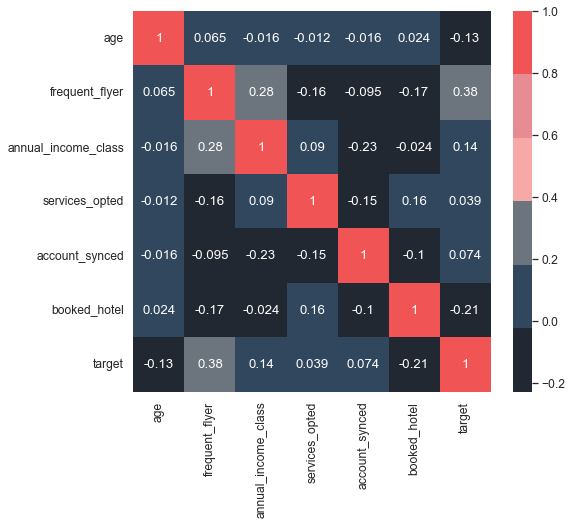

In [21]:
# Gráfico
plt.figure(figsize=(8, 7))
sns.heatmap(data_corr.corr(), annot=True, cmap=CUSTOM_PALETTE_1)

## Modelagem dos dados
___

##### Dummies

In [22]:
data_dummies = pd.get_dummies(data)
data_dummies.columns = [x.lower() for x in data_dummies.columns]
data_dummies.head()

,age,services_opted,target,frequent_flyer_no,frequent_flyer_no record,frequent_flyer_yes,annual_income_class_high income,annual_income_class_low income,annual_income_class_middle income,account_synced_no,account_synced_yes,booked_hotel_no,booked_hotel_yes
0,34,6,0,1,0,0,0,0,1,1,0,0,1
1,34,5,1,0,0,1,0,1,0,0,1,1,0
2,37,3,0,1,0,0,0,0,1,0,1,1,0
3,30,2,0,1,0,0,0,0,1,1,0,1,0
4,30,1,0,1,0,0,0,1,0,1,0,1,0


##### Train/Test

In [23]:
# Separar classe alvo
X = data_dummies.drop('target', axis=1)
y = data_dummies['target']

# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

## Machine Learning
___

##### Teste inicial com vários algoritmos de ML

In [24]:
# Classificadores
classifiers = [['Ada Boosting Classifier', AdaBoostClassifier()],
             ['Decision Tree Classifier', DecisionTreeClassifier()],
             ['Extra Tree Classifier', ExtraTreesClassifier()],
             ['Gausian Naive Bayes', GaussianNB()],
             ['Gradient Boosting Classifier', GradientBoostingClassifier()],
             ['K-Neighbors Classifier', KNeighborsClassifier()],
             ['Logistic Regression', LogisticRegression()],
             ['Random Forest Classifier', RandomForestClassifier()],
             ['Support Vector Classifier', SVC()]]

In [25]:
# Execução
for i, (name, model) in enumerate(classifiers):
    model.random_state = RANDOM_STATE
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    classifiers[i].append(f1_score(y_test, y_pred, average='macro'))
    print(name, classifiers[i][2], sep=': ')

Ada Boosting Classifier: 0.7634050179211469
Decision Tree Classifier: 0.8450135005661528
Extra Tree Classifier: 0.7826761473820297
Gausian Naive Bayes: 0.7311692506459948
Gradient Boosting Classifier: 0.8290709080717488
K-Neighbors Classifier: 0.7957966175907175
Logistic Regression: 0.7410592594014551
Random Forest Classifier: 0.8148387096774192
Support Vector Classifier: 0.43280632411067194


###### F1 Score

A métrica F1 Score foi utilizada ao invés da precisão (accuracy) pelo motivo principal que a classe alvo está desbalanceada, isso faz com que o modelo seja bom em prever verdadeiros negativos (0) e, portanto, a precisão será alta.  
Porém, o mais importante aqui é saber se um cliente vai se desligar da empresa, ou seja, prever um verdadeiro positivo (1), e verdadeiros positivos (1) possuem bem menos dados que verdadeiros negativos (0).  
O F1 Score equilibra precisão e recall, então será melhor para avaliar esse modelo inicialmente.

###### Resultado

In [26]:
result = pd.DataFrame(zip(np.transpose(classifiers)[0], np.transpose(classifiers)[1], 
                          np.transpose(classifiers)[2]), columns=['name', 'model', 'f1_score'])
result = result.sort_values(by='f1_score', ascending=False).reset_index()
result = result.drop(['index'], axis=1)
result

,name,model,f1_score
0,Decision Tree Classifier,DecisionTreeClassifier(random_state=42),0.845014
1,Gradient Boosting Classifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.829071
2,Random Forest Classifier,"(DecisionTreeClassifier(max_features='auto', r...",0.814839
3,K-Neighbors Classifier,KNeighborsClassifier(),0.795797
4,Extra Tree Classifier,"(ExtraTreeClassifier(random_state=1608637542),...",0.782676
5,Ada Boosting Classifier,"(DecisionTreeClassifier(max_depth=1, random_st...",0.763405
6,Logistic Regression,LogisticRegression(random_state=42),0.741059
7,Gausian Naive Bayes,GaussianNB(),0.731169
8,Support Vector Classifier,SVC(random_state=42),0.432806


Text(0.5, 0, 'F1 Score')

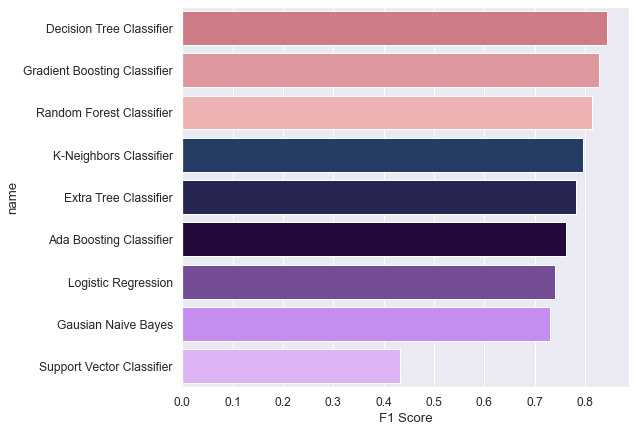

In [27]:
# Gráfico 
plt.figure(figsize=(8, 7))
sns.barplot(data=result, x='f1_score', y='name', palette=CUSTOM_PALETTE_2)
plt.xlabel('F1 Score')

Decision Tree Classifier foi o algoritmo em que houve um melhor f1_score. Vamos explorá-lo melhor.

##### Avaliação inicial do modelo com Decision Tree Classifier

In [28]:
# Modelo inicial
model = result.iloc[0]['model']

# Predição
y_pred = model.predict(X_test)

###### Matriz de confusão

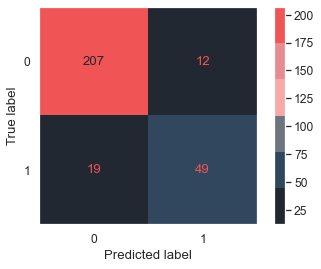

In [29]:
with sns.axes_style('dark'):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=ListedColormap(CUSTOM_PALETTE_1))

###### Relatório de classificação

In [30]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       219
           1       0.80      0.72      0.76        68

    accuracy                           0.89       287
   macro avg       0.86      0.83      0.85       287
weighted avg       0.89      0.89      0.89       287



De fato, percebe-se que a classificação de verdadeiros negativos é melhor que a de verdadeiros positivos, uma vez que a precisão e o recall são maiores.  
Vamos tentar otimizar isso.

##### Otimização Decision Tree Classifier

A otimização será feita utilizando o GridSearch para encontrar os melhores parâmetros, além de fazer a validação cruzada no processo e utilizar padronização dos dados.

    criterion         -> A função para medir a qualidade de uma divisão;
    splitter          -> A estratégia usada para escolher a divisão em cada nó;
    max_depth         -> A profundidade máxima da árvore;
    min_samples_split -> O número mínimo de amostras necessárias para dividir um nó 
                         interno;
    min_samples_leaf  -> O número mínimo de amostras necessárias para estar em um nó 
                         folha.
                        

###### Pipeline

In [31]:
pipe = Pipeline([('scaler', None),
                 ('classifier', DecisionTreeClassifier(random_state=RANDOM_STATE))])

###### Parâmetros do classificador a serem testados

In [32]:
params = {'classifier__criterion'       : ['gini', 'entropy'],
         'classifier__max_depth'        : range(0, 10),
         'classifier__min_samples_split': range(0, 20),
         'classifier__min_samples_leaf' : range(0, 10)}

###### Execução GridSearchCV

In [33]:
# Criar GridSearch
grid = GridSearchCV(estimator=pipe,
                   param_grid=params,
                   cv=5,
                   n_jobs=-1,
                   scoring='f1_macro')

In [34]:
# Executar GridSearch
grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', None),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': range(0, 10),
                         'classifier__min_samples_leaf': range(0, 10),
                         'classifier__min_samples_split': range(0, 20)},
             scoring='f1_macro')

In [35]:
# Melhores parâmetros
best_params = grid.best_params_
best_params

{'classifier__criterion': 'gini',
 'classifier__max_depth': 7,
 'classifier__min_samples_leaf': 4,
 'classifier__min_samples_split': 2}

In [36]:
# Melhor score
best_score = grid.best_score_
best_score

0.8591498115506562

In [37]:
# Melhor estimator
best_estimator = grid.best_estimator_
best_estimator

Pipeline(steps=[('scaler', None),
                ('classifier',
                 DecisionTreeClassifier(max_depth=7, min_samples_leaf=4,
                                        random_state=42))])

##### Verificar overfitting do modelo otimizado

In [38]:
# Modelo otimizado
model = best_estimator.named_steps['classifier']

###### Classificar dados de treino e comparar com dados de teste

In [39]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f' - Train: {train_score:.2f} \n - Test: {test_score:.2f}')

 - Train: 0.92 
 - Test: 0.93


A classificação dos dados de teste em comparação aos dados de treino possui pouca diferença, o modelo consegue classificar ambos com uma precisão semelhante. Isso nos mostra que o modelo não está sendo prejudicado por overfitting.

## Avaliação
___

Vamos avaliar o modelo otimizado com os mesmos dados de teste da avaliação inicial.

In [40]:
# Predição
y_pred = model.predict(X_test)

###### Matriz de confusão

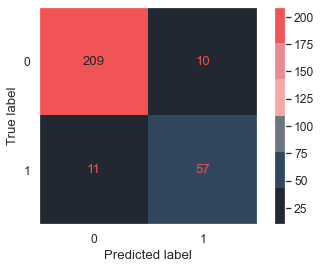

In [41]:
with sns.axes_style('dark'):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=ListedColormap(CUSTOM_PALETTE_1))

###### Relatório de classificação

In [42]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       219
           1       0.85      0.84      0.84        68

    accuracy                           0.93       287
   macro avg       0.90      0.90      0.90       287
weighted avg       0.93      0.93      0.93       287



###### Score validação cruzada

In [43]:
best_score

0.8591498115506562

Vemos então que depois da otimização de parâmetros do modelo, houve uma pequena melhora tanto na precisão, quanto no recall, o que leva a uma melhora no f1-score também. Além disso, ainda temos que o f1-score na validação cruzada foi cerca de 85-86%.

##### Representação da árvore de decisão

In [44]:
text_representation = tree.export_text(model, feature_names=tuple(X.columns))
print(text_representation)

|--- frequent_flyer_yes <= 0.50
|   |--- age <= 28.50
|   |   |--- services_opted <= 1.50
|   |   |   |--- class: 0
|   |   |--- services_opted >  1.50
|   |   |   |--- services_opted <= 2.50
|   |   |   |   |--- class: 1
|   |   |   |--- services_opted >  2.50
|   |   |   |   |--- services_opted <= 3.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- services_opted >  3.50
|   |   |   |   |   |--- booked_hotel_no <= 0.50
|   |   |   |   |   |   |--- services_opted <= 5.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- services_opted >  5.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- booked_hotel_no >  0.50
|   |   |   |   |   |   |--- age <= 27.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- age >  27.50
|   |   |   |   |   |   |   |--- class: 0
|   |--- age >  28.50
|   |   |--- annual_income_class_middle income <= 0.50
|   |   |   |--- services_opted <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--

## Além do que foi explorado
___

Este projeto de Machine Learning foi feito focado principalmente em encontrar um modelo que conseguisse classificar os clientes que estão propensos a cancelarem sua assinatura em uma empresa de viagem e turismo. Após uma análise inicial, o _Decision Tree Classifier_ foi escolhido para uma análise mais profunda e otimização, com o intuito de melhorar o modelo e prevenir overfitting. Porém isso não quer dizer que outros algoritmos não funcionem semelhantemente ou até melhor do que o desenvolvido.  
Há várias possibilidades com os algoritmos citados e isso pode ser explorado, como por exemplo uma comparação entre o algoritmo _Decision Tree Classifier_ e o _Random Forest Classifier_, já que possuem um comportamento muito semelhante.  
Outro ponto é que se pode tentar balancear as classes com técnicas de oversampling ou undersampling, e analisar como os modelos se comportam.